<a href="https://colab.research.google.com/github/kailash-jagadeesh/heart-disease-prediction/blob/master/heart_disease_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [0]:
df = pd.read_csv('cleveland.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']


In [0]:
### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

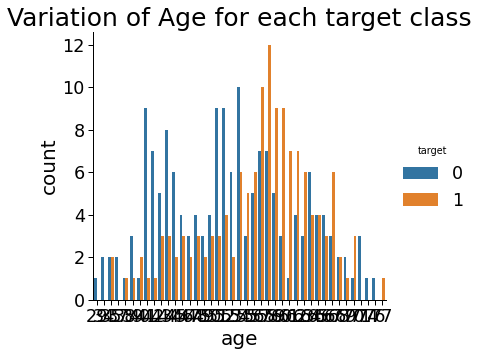

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

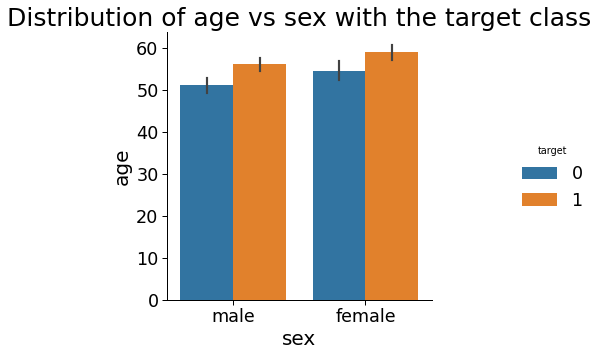

In [0]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [0]:
################################## data preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#########################################   SVM   #############################################################
from sklearn.svm import SVC
vals={}
for i in range(1,101):
  for ii in range(1,101):
    classifier = SVC(kernel='rbf',gamma=(i/100),C=(ii/100))
    classifier.fit(X_train, y_train)

      # Predicting the Test set resultspy
    y_pred = classifier.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm_test = confusion_matrix(y_pred, y_test)

    y_pred_train = classifier.predict(X_train)
    cm_train = confusion_matrix(y_pred_train, y_train)
    vals[(i,ii)]=((cm_train[0][0] + cm_train[1][1])/len(y_train),(cm_test[0][0] + cm_test[1][1])/len(y_test))

    #print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
    #print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(vals)

{(1, 1): (0.512396694214876, 0.6557377049180327), (1, 2): (0.512396694214876, 0.6557377049180327), (1, 3): (0.512396694214876, 0.6557377049180327), (1, 4): (0.5330578512396694, 0.6721311475409836), (1, 5): (0.6694214876033058, 0.819672131147541), (1, 6): (0.7727272727272727, 0.8688524590163934), (1, 7): (0.8016528925619835, 0.8524590163934426), (1, 8): (0.8223140495867769, 0.9016393442622951), (1, 9): (0.8264462809917356, 0.9016393442622951), (1, 10): (0.8264462809917356, 0.9016393442622951), (1, 11): (0.8347107438016529, 0.9016393442622951), (1, 12): (0.8429752066115702, 0.9016393442622951), (1, 13): (0.8388429752066116, 0.9016393442622951), (1, 14): (0.8388429752066116, 0.8852459016393442), (1, 15): (0.8429752066115702, 0.8852459016393442), (1, 16): (0.8429752066115702, 0.8852459016393442), (1, 17): (0.8429752066115702, 0.8852459016393442), (1, 18): (0.8429752066115702, 0.8852459016393442), (1, 19): (0.8471074380165289, 0.8852459016393442), (1, 20): (0.8471074380165289, 0.88524590163

In [0]:
import numpy as np
values=list(vals.values())
keys=list(vals.keys())
temp=[]
temp1=[]
for i in values:
  a,b=i
  temp.append(b)
  temp1.append(a)
print(len(temp))
print(max(temp),temp.index((max(temp))))
print(temp1[temp.index((max(temp)))],temp[temp.index((max(temp)))])
for i in keys:
    if vals[i]==(temp1[temp.index((max(temp)))],temp[temp.index((max(temp)))]):
        a,b=i
        print(a,b)
        break
print(vals[(a,b)])

10000
0.9180327868852459 703
0.8264462809917356 0.9180327868852459
8 4
(0.8264462809917356, 0.9180327868852459)


In [0]:
classifier = SVC(kernel='rbf',gamma=(a/100),C=(b/100))
classifier.fit(X_train, y_train)

# Predicting the Test set resultspy
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
vals[(i,ii)]=((cm_train[0][0] + cm_train[1][1])/len(y_train),(cm_test[0][0] + cm_test[1][1])/len(y_test))

print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for svm = 0.8264462809917356
Accuracy for test set for svm = 0.9180327868852459
